In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer 
import seaborn as sns
from matplotlib import pyplot as plt

In [79]:
data = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/8baa546c1c38f02f9ef2c11333112e89/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/titanic_train.csv')

In [80]:
data.age.isna().sum()

199

In [81]:
data.survived.value_counts()[1] / 981

0.382262996941896

In [82]:
data = data.drop(['ticket'], axis=1)

In [83]:
data.age.isna().sum() / 981

0.20285423037716616

In [84]:
data.cabin.isna().sum() / 981

0.7838939857288482

In [85]:
data['home.dest'].isna().sum() / 981

0.42201834862385323

In [86]:
data = data.drop(['home.dest', 'cabin'], axis=1)
data

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,7.7333,Q
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,7.7500,Q
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,7.2292,C
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,7.8958,S
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,9.5000,S
...,...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,0,0,8.0500,S
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,0,0,8.0500,S
978,2,0,"Gillespie, Mr. William Henry",male,34.0,0,0,13.0000,S
979,3,0,"Barton, Mr. David John",male,22.0,0,0,8.0500,S


In [87]:
s = list(data.sibsp)
p = list(data.parch)

In [88]:
fam_size = []
for i in range(981):
    fam_size.append(s[i] + p[i])

In [89]:
data['fam_size'] = fam_size
data = data.drop(['sibsp', 'parch'], axis=1)
data

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


In [90]:
data.fam_size.mean()

0.8664627930682977

In [91]:
d = data.query("sex == 'male' & pclass == 3")

In [92]:
d

,pclass,survived,name,sex,age,fare,embarked,fam_size
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
5,3,1,"Daly, Mr. Eugene Patrick",male,29.0,7.7500,Q,0
6,3,0,"Wiseman, Mr. Phillippe",male,NaN,7.2500,S,0
8,3,0,"Danoff, Mr. Yoto",male,27.0,7.8958,S,0
...,...,...,...,...,...,...,...,...
970,3,1,"Olsen, Master. Artur Karl",male,9.0,3.1708,S,1
972,3,0,"Goldsmith, Mr. Nathan",male,41.0,7.8500,S,0
974,3,0,"Davies, Mr. Joseph",male,17.0,8.0500,S,2
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0


In [93]:
d = data.query("sex == 'male' & pclass == 3 & survived == 1")
d

,pclass,survived,name,sex,age,fare,embarked,fam_size
5,3,1,"Daly, Mr. Eugene Patrick",male,29.0,7.7500,Q,0
25,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25.0,7.6500,S,0
49,3,1,"Chip, Mr. Chang",male,32.0,56.4958,S,0
56,3,1,"Krekorian, Mr. Neshan",male,25.0,7.2292,C,0
75,3,1,"Niskanen, Mr. Juha",male,39.0,7.9250,S,0
...,...,...,...,...,...,...,...,...
906,3,1,"Sap, Mr. Julius",male,25.0,9.5000,S,0
935,3,1,"Karun, Mr. Franz",male,39.0,13.4167,C,1
962,3,1,"Lindqvist, Mr. Eino William",male,20.0,7.9250,S,1
970,3,1,"Olsen, Master. Artur Karl",male,9.0,3.1708,S,1


In [94]:
61/371

0.16442048517520216

In [95]:
d_s = data.query("survived == 1")
d_s

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
5,3,1,"Daly, Mr. Eugene Patrick",male,29.0,7.7500,Q,0
10,1,1,"Greenfield, Mr. William Bertram",male,23.0,63.3583,C,1
...,...,...,...,...,...,...,...,...
970,3,1,"Olsen, Master. Artur Karl",male,9.0,3.1708,S,1
971,1,1,"Frauenthal, Dr. Henry William",male,50.0,133.6500,S,2
973,2,1,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,23.0000,S,4
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0


In [96]:
d_n = data.query('survived == 0')
d_n

,pclass,survived,name,sex,age,fare,embarked,fam_size
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
6,3,0,"Wiseman, Mr. Phillippe",male,NaN,7.2500,S,0
7,1,0,"Birnbaum, Mr. Jakob",male,25.0,26.0000,C,0
8,3,0,"Danoff, Mr. Yoto",male,27.0,7.8958,S,0
...,...,...,...,...,...,...,...,...
974,3,0,"Davies, Mr. Joseph",male,17.0,8.0500,S,2
975,2,0,"Pengelly, Mr. Frederick William",male,19.0,10.5000,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


<Axes: xlabel='age', ylabel='Count'>

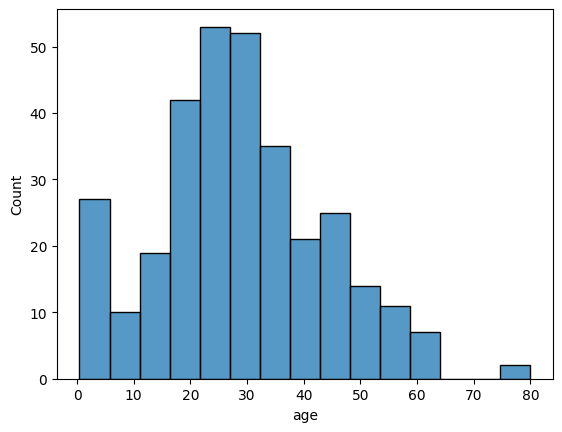

In [97]:
sns.histplot(data=d_s, x='age')

<Axes: xlabel='age', ylabel='Count'>

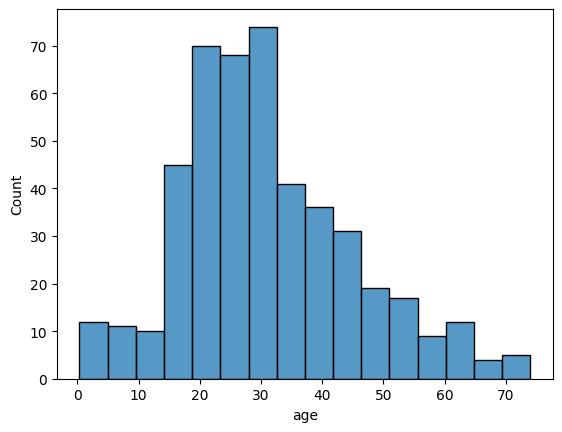

In [98]:
sns.histplot(data=d_n, x='age')

In [99]:
d_1 = data.copy()
d_1

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


In [100]:
d_1 = d_1.dropna()
d_1

,pclass,survived,name,sex,age,fare,embarked,fam_size
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
5,3,1,"Daly, Mr. Eugene Patrick",male,29.0,7.7500,Q,0
7,1,0,"Birnbaum, Mr. Jakob",male,25.0,26.0000,C,0
...,...,...,...,...,...,...,...,...
975,2,0,"Pengelly, Mr. Frederick William",male,19.0,10.5000,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


In [101]:
Y = np.array(list(d_1.survived))
d_1 = d_1.drop(['survived'], axis=1)

In [102]:
d_1 = d_1.drop(['name', 'sex', 'embarked'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(d_1, Y, test_size=0.2, random_state=11, stratify=Y)

In [103]:
log = LogisticRegression(random_state=11, max_iter=1000).fit(X_train, y_train)
pred = log.predict(X_test)

In [104]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.5471698113207547

In [105]:
d_2 = data.copy()

In [106]:
d_2 = d_2.drop(['name', 'sex', 'embarked'], axis=1)

In [107]:
d_2.age.mean()

29.96344846547315

In [108]:
d_2.age = d_2.age.fillna(29.963)

In [109]:
Y = np.array(list(d_2.survived))
d_2 = d_2.drop(['survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(d_2, Y, test_size=0.2, random_state=11, stratify=Y)
log = LogisticRegression(random_state=11, max_iter=1000).fit(X_train, y_train)
pred = log.predict(X_test)
f1_score(y_test, pred)

0.4297520661157025

In [110]:
honorific = []
for i in range(981):
    a = str(data.name.iloc[i])
    k = a.find(',')
    obr = a[k + 2:].split()[0]
    honorific.append(obr)

In [127]:
d_3 = data.copy()
d_3 = d_3.drop(['embarked'], axis=1)
d_3['honorific'] = honorific

In [128]:
len(d_3.honorific.unique())

4

In [129]:
for i in range(981):
    if honorific[i] in ['Rev.', 'Col.', 'Dr.', 'Major.', 'Don.', 'Capt.']:
        honorific[i] = 'Mr.'
    elif honorific[i] in ['Dona.', 'the']:
        honorific[i] = 'Mrs.'
    elif honorific[i] in ['Mlle.', 'Ms.']:
        honorific[i] = 'Miss.'

d_3['honorific'] = honorific

In [130]:
d_3.honorific.value_counts()

Mr.        590
Miss.      198
Mrs.       147
Master.     46
Name: honorific, dtype: int64

In [131]:
d_3.sex.value_counts()

male      636
female    345
Name: sex, dtype: int64

In [132]:
d_3.query("honorific == 'Miss.'").age.mean()

22.00576540880503

In [133]:
46/636

0.07232704402515723

In [134]:
d_3.query("honorific == 'Mr.'").age.mean()

32.90043763676149

In [135]:
d_3.query("honorific == 'Mrs.'").age.mean()

36.98425196850393

In [136]:
d_3.query("honorific == 'Master.'").age.mean()

5.128205128205129

In [137]:
age = list(d_3.age)

In [138]:
for i in range(981):
    if str(age[i]) == 'nan':
        if honorific[i] == 'Miss.':
            age[i] = 22.006
        elif honorific[i] == 'Mr.':
            age[i] = 32.9
        elif honorific[i] == 'Mrs.':
            age[i] = 36.984
        else:
            age[i] = 5.128
d_3['age'] = age

In [139]:
d_3 = d_3.drop(['name', 'sex', 'honorific'], axis=1)

In [140]:
d_3

,pclass,survived,age,fare,fam_size
0,3,1,22.006,7.7333,0
1,3,1,22.006,7.7500,0
2,3,1,38.000,7.2292,0
3,3,0,22.000,7.8958,0
4,3,0,16.000,9.5000,0
...,...,...,...,...,...
976,3,1,22.006,8.0500,0
977,3,1,19.000,8.0500,0
978,2,0,34.000,13.0000,0
979,3,0,22.000,8.0500,0


In [141]:
Y = np.array(list(d_3.survived))
d_3 = d_3.drop(['survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(d_3, Y, test_size=0.2, random_state=11, stratify=Y)
log = LogisticRegression(random_state=11, max_iter=1000).fit(X_train, y_train)
pred = log.predict(X_test)
f1_score(y_test, pred)

0.43902439024390244

In [142]:
d_4 = data.copy()

In [143]:
d_4['age'] = age

In [144]:
d_4 = d_4.join(pd.get_dummies(d_4.sex, drop_first=True))
d_4 = d_4.join(pd.get_dummies(d_4.embarked, drop_first=True))

d_4 = d_4.drop(['name', 'sex', 'embarked'], axis=1)

d_4

,pclass,survived,age,fare,fam_size,male,Q,S
0,3,1,22.006,7.7333,0,0,1,0
1,3,1,22.006,7.7500,0,0,1,0
2,3,1,38.000,7.2292,0,0,0,0
3,3,0,22.000,7.8958,0,1,0,1
4,3,0,16.000,9.5000,0,1,0,1
...,...,...,...,...,...,...,...,...
976,3,1,22.006,8.0500,0,0,0,1
977,3,1,19.000,8.0500,0,1,0,1
978,2,0,34.000,13.0000,0,1,0,1
979,3,0,22.000,8.0500,0,1,0,1


In [145]:
Y = np.array(list(d_4.survived))
d_4 = d_4.drop(['survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(d_4, Y, test_size=0.2, random_state=11, stratify=Y)
log = LogisticRegression(random_state=11, max_iter=1000).fit(X_train, y_train)
pred = log.predict(X_test)
f1_score(y_test, pred)

0.6575342465753424

In [173]:
X_test = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/d8ceed85493379b660b9a8a4099615c4/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/titanic_reserved.csv')
data = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/8baa546c1c38f02f9ef2c11333112e89/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/titanic_train.csv')

In [174]:
Y = np.array(list(data.survived))
X_train = data.drop(['survived'], axis=1)

In [175]:
fam_size = []
s = list(X_train.sibsp)
p = list(X_train.parch)
for i in range(len(X_train)):
    fam_size.append(s[i] + p[i])
X_train['fam_size'] = fam_size
X_train = X_train.drop(['sibsp', 'parch', 'ticket', 'cabin', 'home.dest'], axis=1)

fam_size = []
s = list(X_test.sibsp)
p = list(X_test.parch)
for i in range(len(X_test)):
    fam_size.append(s[i] + p[i])
X_test['fam_size'] = fam_size
X_test = X_test.drop(['sibsp', 'parch', 'ticket', 'cabin', 'home.dest'], axis=1)

In [176]:
X_test

,pclass,name,sex,age,fare,embarked,fam_size
0,3,"Sage, Mr. Frederick",male,NaN,69.5500,S,10
1,1,"Snyder, Mr. John Pillsbury",male,24.0000,82.2667,S,1
2,2,"Ashby, Mr. John",male,57.0000,13.0000,S,0
3,3,"Rosblom, Mr. Viktor Richard",male,18.0000,20.2125,S,2
4,2,"Doling, Miss. Elsie",female,18.0000,23.0000,S,1
...,...,...,...,...,...,...,...
323,1,"Brewe, Dr. Arthur Jackson",male,NaN,39.6000,C,0
324,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0000,26.5500,S,0
325,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,82.1708,C,1
326,2,"Caldwell, Master. Alden Gates",male,0.8333,29.0000,S,2


In [177]:
honorific = []
for i in range(len(X_train)):
    a = str(X_train.name.iloc[i])
    k = a.find(',')
    obr = a[k + 2:].split()[0]
    honorific.append(obr)

for i in range(len(X_train)):
    if honorific[i] in ['Rev.', 'Col.', 'Dr.', 'Major.', 'Don.', 'Capt.']:
        honorific[i] = 'Mr.'
    elif honorific[i] in ['Dona.', 'the']:
        honorific[i] = 'Mrs.'
    elif honorific[i] in ['Mlle.', 'Ms.']:
        honorific[i] = 'Miss.'

X_train['honorific'] = honorific

In [178]:
honorific = []
for i in range(len(X_test)):
    a = str(X_test.name.iloc[i])
    k = a.find(',')
    obr = a[k + 2:].split()[0]
    honorific.append(obr)

for i in range(len(X_test)):
    if honorific[i] in ['Rev.', 'Col.', 'Dr.', 'Major.', 'Don.', 'Capt.']:
        honorific[i] = 'Mr.'
    elif honorific[i] in ['Dona.', 'the']:
        honorific[i] = 'Mrs.'
    elif honorific[i] in ['Mlle.', 'Ms.']:
        honorific[i] = 'Miss.'

X_test['honorific'] = honorific

In [179]:
X_train.query("honorific == 'Miss.'").age.mean()

22.00576540880503

In [180]:
X_train.query("honorific == 'Master.'").age.mean()

5.128205128205129

In [181]:
X_train.query("honorific == 'Mrs.'").age.mean()

36.98425196850393

In [182]:
X_train.query("honorific == 'Mr.'").age.mean()

32.90043763676149

In [183]:
age = list(X_train.age)
for i in range(len(X_train)):
    if str(age[i]) == 'nan':
        if honorific[i] == 'Miss.':
            age[i] = 22.006
        elif honorific[i] == 'Mr.':
            age[i] = 32.9
        elif honorific[i] == 'Mrs.':
            age[i] = 36.984
        else:
            age[i] = 5.128
X_train['age'] = age

IndexError: ignored

In [158]:
age = list(X_test.age)
for i in range(len(X_test)):
    if str(age[i]) == 'nan':
        if honorific[i] == 'Miss.':
            age[i] = 22.006
        elif honorific[i] == 'Mr.':
            age[i] = 32.9
        elif honorific[i] == 'Mrs.':
            age[i] = 36.984
        else:
            age[i] = 5.128
X_test['age'] = age

In [ ]:
X_train = X_train.join(pd.get_dummies(X_train.sex, drop_first=True))
X_train = X_train.join(pd.get_dummies(X_train.embarked, drop_first=True))

X_train = X_train.drop(['name', 'sex', 'embarked', 'honorific'], axis=1)

X_test = X_test.join(pd.get_dummies(X_test.sex, drop_first=True))
X_test = X_test.join(pd.get_dummies(X_test.embarked, drop_first=True))

X_test = X_test.drop(['name', 'sex', 'embarked', 'honorific'], axis=1)


In [ ]:
X_test

,pclass,age,fare,fam_size,male,Q,S
0,3,32.9000,69.5500,10,1,0,1
1,1,24.0000,82.2667,1,1,0,1
2,2,57.0000,13.0000,0,1,0,1
3,3,18.0000,20.2125,2,1,0,1
4,2,18.0000,23.0000,1,0,0,1
...,...,...,...,...,...,...,...
323,1,32.9000,39.6000,0,1,0,0
324,1,45.0000,26.5500,0,1,0,1
325,1,36.9840,82.1708,1,0,0,0
326,2,0.8333,29.0000,2,1,0,1


In [ ]:
log = LogisticRegression(max_iter=1000).fit(X_train, Y)
pred = log.predict(X_test)

In [ ]:
print(list(pred))

[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]


In [ ]:
log = LogisticRegression(max_iter=1000, random_state=21).fit(X_train, Y)
pred = log.predict(X_test)
print(list(pred))

[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]


In [ ]:
import category_encoders as ce

X_cat = X_train[['sex', 'embarked']].copy()
X_notcat = X_train[['pclass', 'age', 'fare', 'fam_size']]

te = ce.target_encoder.TargetEncoder(cols=X_cat.columns)
X_cat_ce = te.fit_transform(X_cat, Y)
X_final_ce = pd.concat([X_cat_ce, X_notcat], axis=1)
X_final_ce

,sex,embarked,pclass,age,fare,fam_size
0,0.721739,0.340014,3,22.006,7.7333,0
1,0.721739,0.340014,3,22.006,7.7500,0
2,0.721739,0.575000,3,38.000,7.2292,0
3,0.198113,0.331865,3,22.000,7.8958,0
4,0.198113,0.331865,3,16.000,9.5000,0
...,...,...,...,...,...,...
976,0.721739,0.331865,3,22.006,8.0500,0
977,0.198113,0.331865,3,19.000,8.0500,0
978,0.198113,0.331865,2,34.000,13.0000,0
979,0.198113,0.331865,3,22.000,8.0500,0


In [ ]:
X_cat = X_test[['sex', 'embarked']].copy()
X_notcat = X_test[['pclass', 'age', 'fare', 'fam_size']]


X_cat_ce = te.transform(X_cat)
X_final_te = pd.concat([X_cat_ce, X_notcat], axis=1)
X_final_te

,sex,embarked,pclass,age,fare,fam_size
0,0.198113,0.331865,3,32.9000,69.5500,10
1,0.198113,0.331865,1,24.0000,82.2667,1
2,0.198113,0.331865,2,57.0000,13.0000,0
3,0.198113,0.331865,3,18.0000,20.2125,2
4,0.721739,0.331865,2,18.0000,23.0000,1
...,...,...,...,...,...,...
323,0.198113,0.575000,1,32.9000,39.6000,0
324,0.198113,0.331865,1,45.0000,26.5500,0
325,0.721739,0.575000,1,36.9840,82.1708,1
326,0.198113,0.331865,2,0.8333,29.0000,2


In [ ]:
log = LogisticRegression(max_iter=1000, random_state=21).fit(X_final_ce, Y)
pred = log.predict(X_final_te)
print(list(pred))

[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]
